In [148]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
# Load Data
data=pd.read_csv('/content/BANK LOAN.csv')

In [150]:
# Display Data
data

,SN,AGE,EMPLOY,ADDRESS,DEBTINC,CREDDEBT,OTHDEBT,DEFAULTER
0,1,3,17,12,9.3,11.36,5.01,1
1,2,1,10,6,17.3,1.36,4.00,0
2,3,2,15,14,5.5,0.86,2.17,0
3,4,3,15,14,2.9,2.66,0.82,0
4,5,1,2,0,17.3,1.79,3.06,1
...,...,...,...,...,...,...,...,...
695,696,2,6,15,4.6,0.26,0.98,1
696,697,1,6,4,11.5,0.37,2.05,0
697,698,2,15,3,7.6,0.49,1.94,0
698,699,3,19,22,8.4,2.30,4.17,0


In [151]:
# Display Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SN         700 non-null    int64  
 1   AGE        700 non-null    int64  
 2   EMPLOY     700 non-null    int64  
 3   ADDRESS    700 non-null    int64  
 4   DEBTINC    700 non-null    float64
 5   CREDDEBT   700 non-null    float64
 6   OTHDEBT    700 non-null    float64
 7   DEFAULTER  700 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 43.9 KB


In [152]:
# Count Age Values
data['AGE'].value_counts()

,count
AGE,
2,284
1,242
3,174


In [153]:
# Convert Age to Category
data['AGE']=data['AGE'].astype('category')

In [154]:
# Display Data Info (after conversion)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   SN         700 non-null    int64   
 1   AGE        700 non-null    category
 2   EMPLOY     700 non-null    int64   
 3   ADDRESS    700 non-null    int64   
 4   DEBTINC    700 non-null    float64 
 5   CREDDEBT   700 non-null    float64 
 6   OTHDEBT    700 non-null    float64 
 7   DEFAULTER  700 non-null    int64   
dtypes: category(1), float64(3), int64(4)
memory usage: 39.2 KB


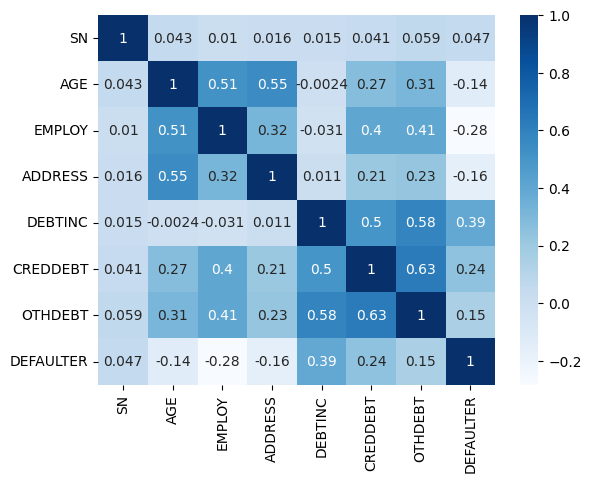

In [155]:
# Display Correlation Heatmap
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.show()

In [156]:
# Display Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   SN         700 non-null    int64   
 1   AGE        700 non-null    category
 2   EMPLOY     700 non-null    int64   
 3   ADDRESS    700 non-null    int64   
 4   DEBTINC    700 non-null    float64 
 5   CREDDEBT   700 non-null    float64 
 6   OTHDEBT    700 non-null    float64 
 7   DEFAULTER  700 non-null    int64   
dtypes: category(1), float64(3), int64(4)
memory usage: 39.2 KB


In [157]:
# Drop SN column
data.drop(['SN'],axis=1,inplace=True)

In [158]:
# Get Defaulter Value Counts
sizes=data['DEFAULTER'].value_counts().values

In [159]:
# Display Defaulter Value Counts
data['DEFAULTER'].value_counts()

,count
DEFAULTER,
0,517
1,183


In [160]:
# Display sizes
sizes

array([517, 183])

In [161]:
# Get Defaulter Labels
labels=data['DEFAULTER'].value_counts().index

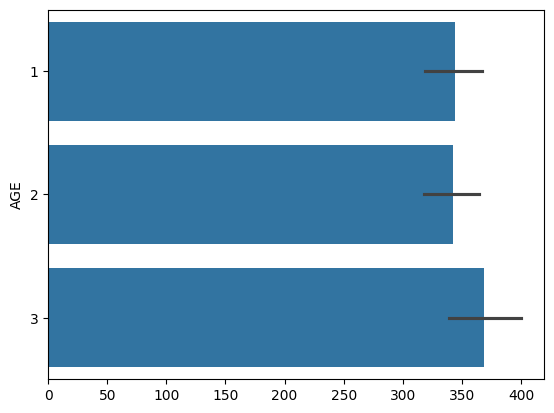

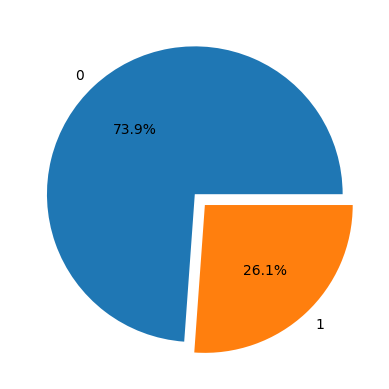

In [162]:
# Plot Age Bar Plot and Defaulter Pie Chart
sns.barplot(data['AGE'])
plt.show()
plt.pie(sizes, labels=labels, explode=(0,0.1), autopct='%1.1f%%')
plt.show()

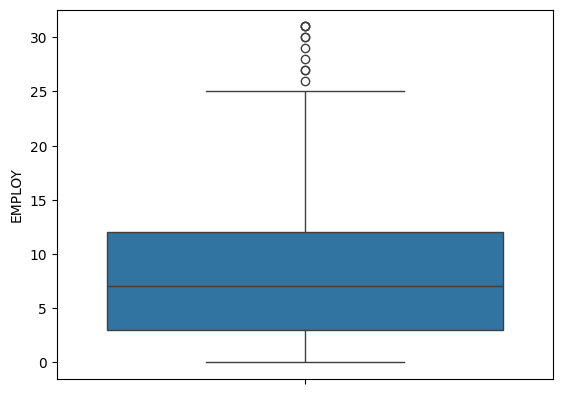

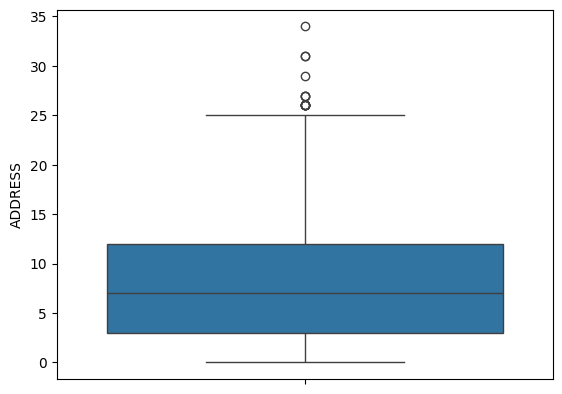

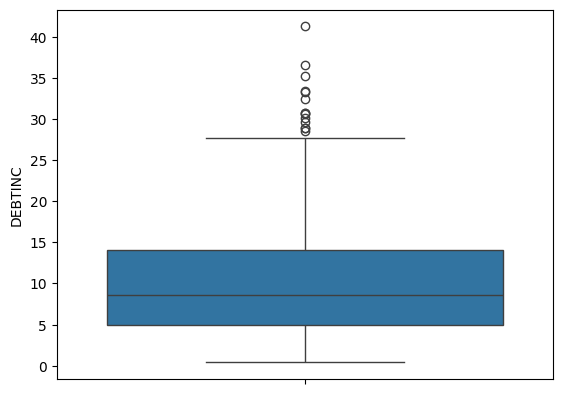

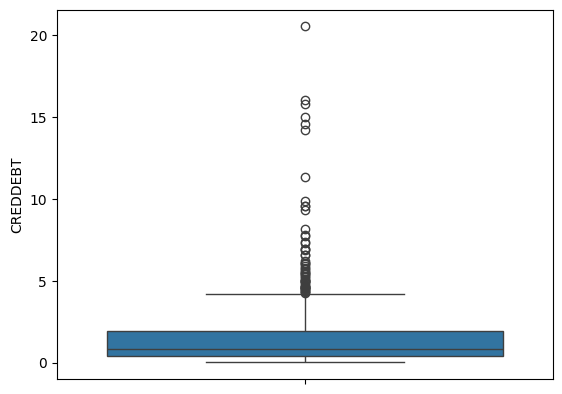

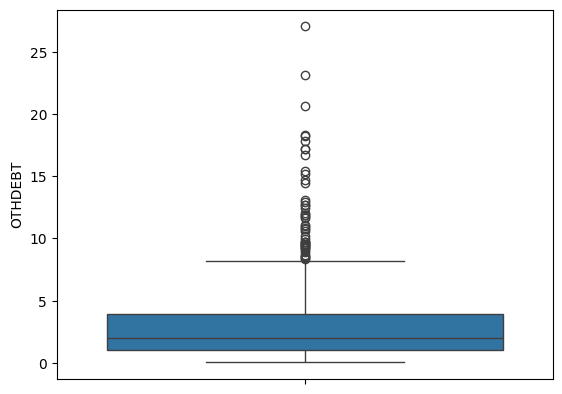

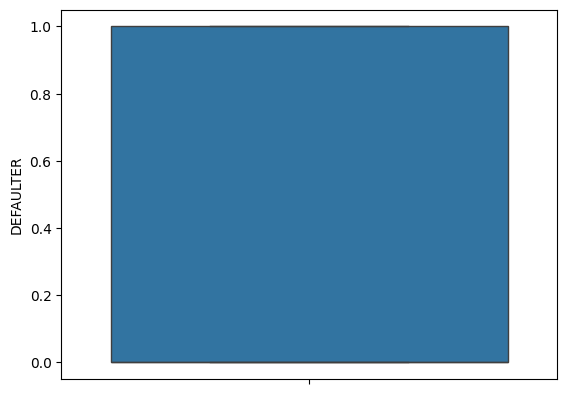

In [163]:
# Display Boxplots for Non-Categorical Columns
for i in data.columns:
  if data[i].dtype!='category':
    sns.boxplot(data[i])
    plt.show()

In [164]:
# Import logit from statsmodels
from statsmodels.formula.api import logit

In [165]:
# Display Data Columns
data.columns

Index(['AGE', 'EMPLOY', 'ADDRESS', 'DEBTINC', 'CREDDEBT', 'OTHDEBT',
       'DEFAULTER'],
      dtype='object')

In [166]:
# Fit Logit Model 1
model=logit('DEFAULTER~AGE+EMPLOY+ADDRESS+DEBTINC+CREDDEBT+OTHDEBT',data=data).fit()

Optimization terminated successfully.
         Current function value: 0.395291
         Iterations 7


In [167]:
# Display Logit Model 1 Summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              DEFAULTER   No. Observations:                  700
Model:                          Logit   Df Residuals:                      692
Method:                           MLE   Df Model:                            7
Date:                Mon, 14 Jul 2025   Pseudo R-squ.:                  0.3120
Time:                        20:36:12   Log-Likelihood:                -276.70
converged:                       True   LL-Null:                       -402.18
Covariance Type:            nonrobust   LLR p-value:                 1.733e-50
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7882      0.264     -2.985      0.003      -1.306      -0.271
AGE[T.2]       0.2520      0.267      0.946      0.344      -0.270       0.774
AGE[T.3]       0.6271      0.361      1.739      0.082      -0.080       1.334
EMPLOY        -0.2617      0.032     -8.211      0.000      -0.324      -0.199
ADDRESS       -0.0996      0.022     -4.459      0.000      -0.143      -0.056
DEBTINC        0.0851      0.022      3.845      0.000       0.042       0.128
CREDDEBT       0.5634      0.089      6.347      0.000       0.389       0.737
OTHDEBT        0.0231      0.057      0.405      0.685      -0.089       0.135
==============================================================================
"""

In [168]:
# Fit Logit Model 2 (without OTHDEBT)
model1=logit('DEFAULTER~AGE+EMPLOY+ADDRESS+DEBTINC+CREDDEBT',data=data).fit()

Optimization terminated successfully.
         Current function value: 0.395407
         Iterations 7


In [169]:
# Display Logit Model 2 Summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              DEFAULTER   No. Observations:                  700
Model:                          Logit   Df Residuals:                      693
Method:                           MLE   Df Model:                            6
Date:                Mon, 14 Jul 2025   Pseudo R-squ.:                  0.3118
Time:                        20:36:13   Log-Likelihood:                -276.79
converged:                       True   LL-Null:                       -402.18
Covariance Type:            nonrobust   LLR p-value:                 2.775e-51
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8149      0.256     -3.184      0.001      -1.317      -0.313
AGE[T.2]       0.2534      0.266      0.951      0.342      -0.269       0.776
AGE[T.3]       0.6412      0.359      1.786      0.074      -0.063       1.345
EMPLOY        -0.2576      0.030     -8.571      0.000      -0.317      -0.199
ADDRESS       -0.0989      0.022     -4.443      0.000      -0.142      -0.055
DEBTINC        0.0899      0.019      4.827      0.000       0.053       0.126
CREDDEBT       0.5683      0.088      6.483      0.000       0.397       0.740
==============================================================================
"""

In [170]:
# Empty Cell


In [171]:
# Fit Logit Model 3 (without AGE and OTHDEBT)
model2=logit('DEFAULTER~EMPLOY+ADDRESS+DEBTINC+CREDDEBT',data=data).fit()

Optimization terminated successfully.
         Current function value: 0.397671
         Iterations 7


In [172]:
# Display Logit Model 3 Summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              DEFAULTER   No. Observations:                  700
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                            4
Date:                Mon, 14 Jul 2025   Pseudo R-squ.:                  0.3079
Time:                        20:36:15   Log-Likelihood:                -278.37
converged:                       True   LL-Null:                       -402.18
Covariance Type:            nonrobust   LLR p-value:                 2.114e-52
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7911      0.252     -3.145      0.002      -1.284      -0.298
EMPLOY        -0.2426      0.028     -8.646      0.000      -0.298      -0.188
ADDRESS       -0.0812      0.020     -4.144      0.000      -0.120      -0.043
DEBTINC        0.0883      0.019      4.760      0.000       0.052       0.125
CREDDEBT       0.5729      0.087      6.566      0.000       0.402       0.744
==============================================================================
"""

In [173]:
# Predict probabilities using Model 3
data['pred1']=pd.Series(model2.predict())

In [174]:
# Convert probabilities to binary predictions
data['pred']=data['pred1'].apply(lambda x:1 if x>=0.5 else 0)

In [175]:
# Split Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
data_train,data_test=train_test_split(data,test_size=0.3,random_state=42)

In [176]:
# Fit Logit Model 3 (again)
model2=logit('DEFAULTER~EMPLOY+ADDRESS+DEBTINC+CREDDEBT',data=data).fit()

Optimization terminated successfully.
         Current function value: 0.397671
         Iterations 7


In [177]:
# Display Data
data

,AGE,EMPLOY,ADDRESS,DEBTINC,CREDDEBT,OTHDEBT,DEFAULTER,pred1,pred
0,3,17,12,9.3,11.36,5.01,1,0.808347,1
1,1,10,6,17.3,1.36,4.00,0,0.198115,0
2,2,15,14,5.5,0.86,2.17,0,0.010063,0
3,3,15,14,2.9,2.66,0.82,0,0.022160,0
4,1,2,0,17.3,1.79,3.06,1,0.781808,1
...,...,...,...,...,...,...,...,...,...
695,2,6,15,4.6,0.26,0.98,1,0.051665,0
696,1,6,4,11.5,0.37,2.05,0,0.206780,0
697,2,15,3,7.6,0.49,1.94,0,0.023615,0
698,3,19,22,8.4,2.30,4.17,0,0.005894,0


In [178]:
# Calculate Accuracy Score
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(data['DEFAULTER'],data['pred'])

0.8142857142857143

In [179]:
# Calculate Confusion Matrix
cm=confusion_matrix(data['DEFAULTER'],data['pred'])

In [180]:
# Display Confusion Matrix
cm

array([[478,  39],
       [ 91,  92]])

In [181]:
# Calculate Specificity and Sensitivity
specificity=cm[0,0]/(cm[0,0]+cm[0,1])
sensitivity=cm[1,1]/(cm[1,0]+cm[1,1])

In [182]:
# Display Sensitivity
sensitivity

np.float64(0.5027322404371585)

In [183]:
# Display Specificity
specificity

np.float64(0.9245647969052224)

In [184]:
# Calculate and Display Evaluation Metrics
from sklearn.metrics import roc_curve,roc_auc_score,precision_score,recall_score,f1_score
print(roc_auc_score(data['DEFAULTER'],data['pred']))
print(precision_score(data['DEFAULTER'],data['pred']))
print(recall_score(data['DEFAULTER'],data['pred']))
print(f1_score(data['DEFAULTER'],data['pred']))

0.7136485186711905
0.7022900763358778
0.5027322404371585
0.5859872611464968


In [185]:
# Display Classification Report
from sklearn.metrics import classification_report
print(classification_report(data['DEFAULTER'],data['pred']))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       517
           1       0.70      0.50      0.59       183

    accuracy                           0.81       700
   macro avg       0.77      0.71      0.73       700
weighted avg       0.80      0.81      0.80       700



In [186]:
# Import auc from sklearn.metrics
from sklearn.metrics import auc

In [187]:
# Calculate ROC AUC Score
auc_score=roc_auc_score(data['DEFAULTER'],data['pred'])

In [188]:
# Calculate ROC Curve and AUC
fpr,tpr,threshold=roc_curve(data['DEFAULTER'],data['pred'])
roc=auc(fpr,tpr)

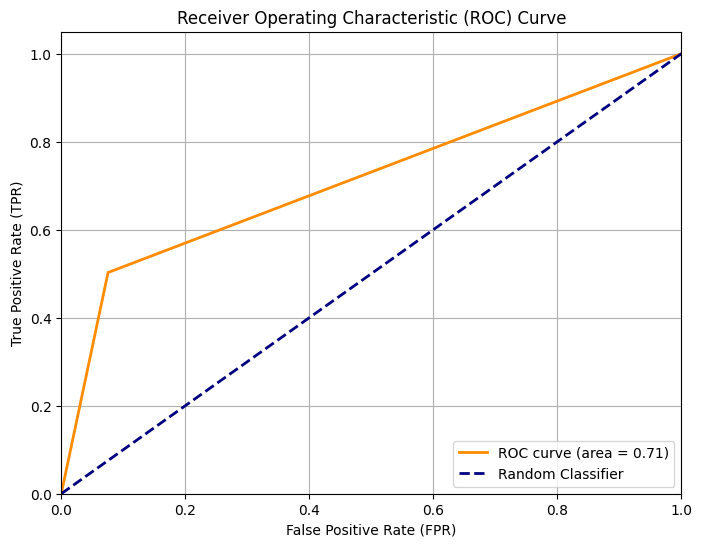

AUC Score: 0.71


In [189]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"AUC Score: {auc_score:.2f}")

In [190]:
# Fit Logistic Regression Model (scikit-learn)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
X = data[['EMPLOY', 'ADDRESS', 'DEBTINC', 'CREDDEBT']]  # Features
y = data['DEFAULTER']  # Target variable
lr.fit(X, y)

LogisticRegression()

In [191]:
# Make Predictions using scikit-learn model
pred2=lr.predict(X)

In [192]:
# Get Prediction Probabilities using scikit-learn model
pred_proba=lr.predict_proba(X)[:,1]

In [193]:
# Display Data
data

,AGE,EMPLOY,ADDRESS,DEBTINC,CREDDEBT,OTHDEBT,DEFAULTER,pred1,pred
0,3,17,12,9.3,11.36,5.01,1,0.808347,1
1,1,10,6,17.3,1.36,4.00,0,0.198115,0
2,2,15,14,5.5,0.86,2.17,0,0.010063,0
3,3,15,14,2.9,2.66,0.82,0,0.022160,0
4,1,2,0,17.3,1.79,3.06,1,0.781808,1
...,...,...,...,...,...,...,...,...,...
695,2,6,15,4.6,0.26,0.98,1,0.051665,0
696,1,6,4,11.5,0.37,2.05,0,0.206780,0
697,2,15,3,7.6,0.49,1.94,0,0.023615,0
698,3,19,22,8.4,2.30,4.17,0,0.005894,0


### Import Libraries

### Load Data

### Display Data

### Display Data Info

### Count Age Values

### Convert Age to Category

### Display Data Info (after conversion)

### Display Correlation Heatmap

### Display Data Info

### Drop SN column

### Get Defaulter Value Counts

### Display Defaulter Value Counts

### Display sizes

### Get Defaulter Labels

### Plot Age Bar Plot and Defaulter Pie Chart

### Empty Cell

### Display Boxplots for Non-Categorical Columns

### Import logit from statsmodels

### Display Data Columns

### Fit Logit Model 1

### Display Logit Model 1 Summary

### Fit Logit Model 2 (without OTHDEBT)

### Display Logit Model 2 Summary

### Empty Cell

### Fit Logit Model 3 (without AGE and OTHDEBT)

### Display Logit Model 3 Summary

### Predict probabilities using Model 3

### Convert probabilities to binary predictions

### Split Data into Training and Testing Sets

### Fit Logit Model 3 (again)

### Display Data

### Calculate Accuracy Score

### Calculate Confusion Matrix

### Display Confusion Matrix

### Calculate Specificity and Sensitivity

### Display Sensitivity

### Display Specificity

### Calculate and Display Evaluation Metrics

### Display Classification Report

### Import auc from sklearn.metrics

### Calculate ROC AUC Score

### Calculate ROC Curve and AUC

### Plot ROC Curve

### Fit Logistic Regression Model (scikit-learn)

### Make Predictions using scikit-learn model

### Get Prediction Probabilities using scikit-learn model

### Display Data